## 1. Quantities: 
This type of graph shows the levels of variables. Also, these graphs show the variables according to categories or classifications.

In [445]:
library(ggplot2)  # plots packages
library(tidyr) # read and filter dataset

library(haven)  # read STATA.dta 
library(dplyr)  # filter dataset

In [ ]:
# install.packages("ggplot2")

In [518]:
enaho <- read_dta("../../data/ENAHO/enaho.dta", encoding = "latin1")

In [519]:
attach(enaho)

The following objects are masked from enaho (pos = 3):

    acumulado, alfa1, alfa2, alfa3, alfa4, alfa5, alfa6, alfa7,
    aniorec, area, civil, codperso, conglome, contrato, d_edu, d544t,
    d556t1, d556t2, d557t, d558t, dep_1, dep_10, dep_11, dep_12,
    dep_13, dep_14, dep_15, dep_16, dep_17, dep_18, dep_19, dep_2,
    dep_20, dep_21, dep_22, dep_23, dep_24, dep_3, dep_4, dep_5, dep_6,
    dep_7, dep_8, dep_9, dominio, dominioA, dpto, edad, edad_2, educ,
    educa, empresa, estrato, estud, exper, exper_2, facpob07, hogar,
    horas, horas_1, horas_2, i00, i01, i02, i03, i04, i05, i06, i07,
    i08, i524e1, i530a, i538e1, i541a, informal, ing_n_labor, ingreso,
    ingreso_r, jefe, l_n_labor, l_salario, labor, ld, lengua,
    menores_17, menores_6, monoparental, n_labor, nivel_edu1,
    nivel_edu2, ocu500, p203, p204, p507, panel, salario, sector, sexo,
    tenure, tenure_2, tipo_hogar, ubigeo, ubigeo_2, vivienda, year


The following objects are masked from enaho (pos = 4):

    ac

In [520]:
head(enaho)

year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,⋯,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<chr>
2011,0061,077,11,010701,04,7,4,2.011006e+14,3,⋯,6,5,11,1,2,4,NA,361,0,010000
2011,0110,112,11,010705,05,7,7,2.011011e+14,3,⋯,6,5,11,1,3,9,9,400,0,010000
2011,0090,076,11,010205,03,7,7,2.011009e+14,5,⋯,6,5,11,1,5,25,36,484,0,010000
2011,0118,080,11,010401,03,7,8,2.011012e+14,3,⋯,6,5,11,1,6,36,NA,529,0,010000
2011,3408,066,11,010402,03,7,7,2.011341e+14,3,⋯,6,5,11,1,3,9,0,400,0,010000
2011,0002,045,11,010101,03,4,4,2.011000e+14,3,⋯,11,2,13,4,0,0,NA,361,0,010000


In [521]:
str(enaho)

tibble [160,772 × 105] (S3: tbl_df/tbl/data.frame)
 $ year        : chr [1:160772] "2011" "2011" "2011" "2011" ...
  ..- attr(*, "format.stata")= chr "%9s"
 $ conglome    : chr [1:160772] "0061" "0110" "0090" "0118" ...
  ..- attr(*, "label")= chr "conglomerado"
  ..- attr(*, "format.stata")= chr "%9s"
 $ vivienda    : chr [1:160772] "077" "112" "076" "080" ...
  ..- attr(*, "label")= chr "nÂ° de selecciÃ³n de la vivienda"
  ..- attr(*, "format.stata")= chr "%3s"
 $ hogar       : chr [1:160772] "11" "11" "11" "11" ...
  ..- attr(*, "label")= chr "hogar"
  ..- attr(*, "format.stata")= chr "%2s"
 $ ubigeo      : chr [1:160772] "010701" "010705" "010205" "010401" ...
  ..- attr(*, "label")= chr "cÃ³digo de distrito (ubicaciÃ³n geogrÃ¡fica)"
  ..- attr(*, "format.stata")= chr "%6s"
 $ codperso    : chr [1:160772] "04" "05" "03" "03" ...
  ..- attr(*, "label")= chr "nÂ° de orden de la persona"
  ..- attr(*, "format.stata")= chr "%2s"
 $ dominio     : dbl+lbl [1:160772] 7, 7, 7, 7, 7, 4, 7, 

In [522]:
unique(enaho["empresa"])

empresa
<dbl+lbl>
NA
1
4
2
3


In [523]:
enaho <- enaho %>% mutate(empresa = case_when(empresa == 1 ~ "Microempresa",
                                          empresa == 2 ~ "Pequeña empresa", empresa == 3 ~ "Mediana empresa",
                                          empresa == 4 ~ "Gran empresa")) %>%
                    mutate(area = case_when(area == 0 ~ "Rural",
                                          area == 1 ~ "Urbano"))

# tydeverse : dplyr , ggplot2, tdyr

### Number of companies classification by number of workers hired
Microbusinesses < 10 workers ;
Small businesses (10-20 workers);
Medium businesses (21-100 workers);
Big Businesses (>100 workers)

In [524]:
#library(tidyverse)  # include ggplot2, dply, tidyr , readr more packages

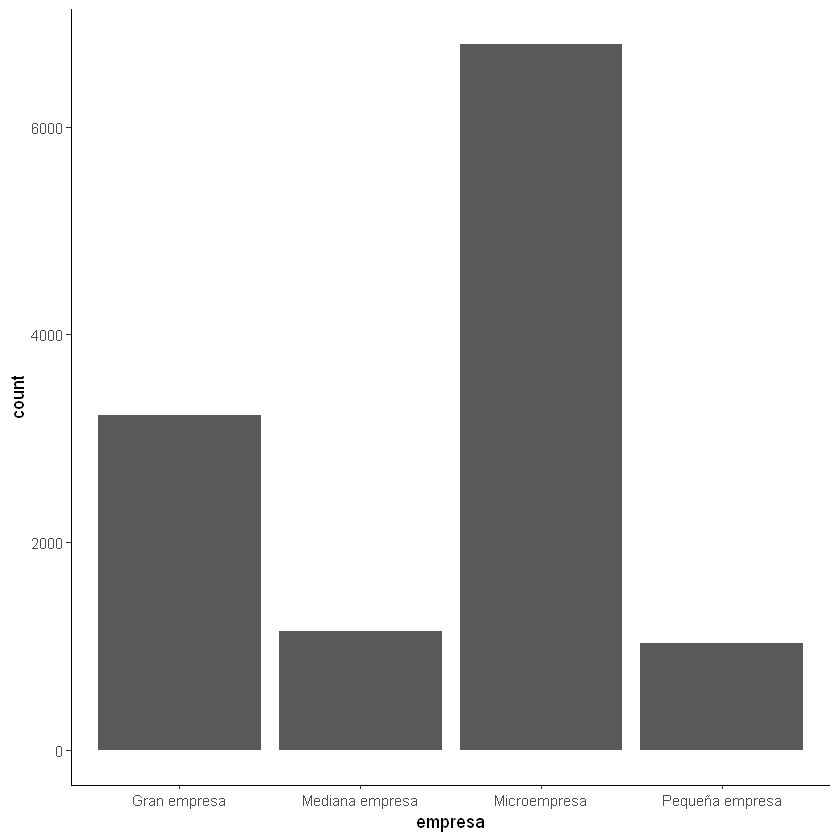

In [525]:
theme_set(theme_classic())

enaho %>% filter(year == 2019 & ! is.na(empresa)) %>%
 ggplot(aes(x= empresa)) + geom_bar()

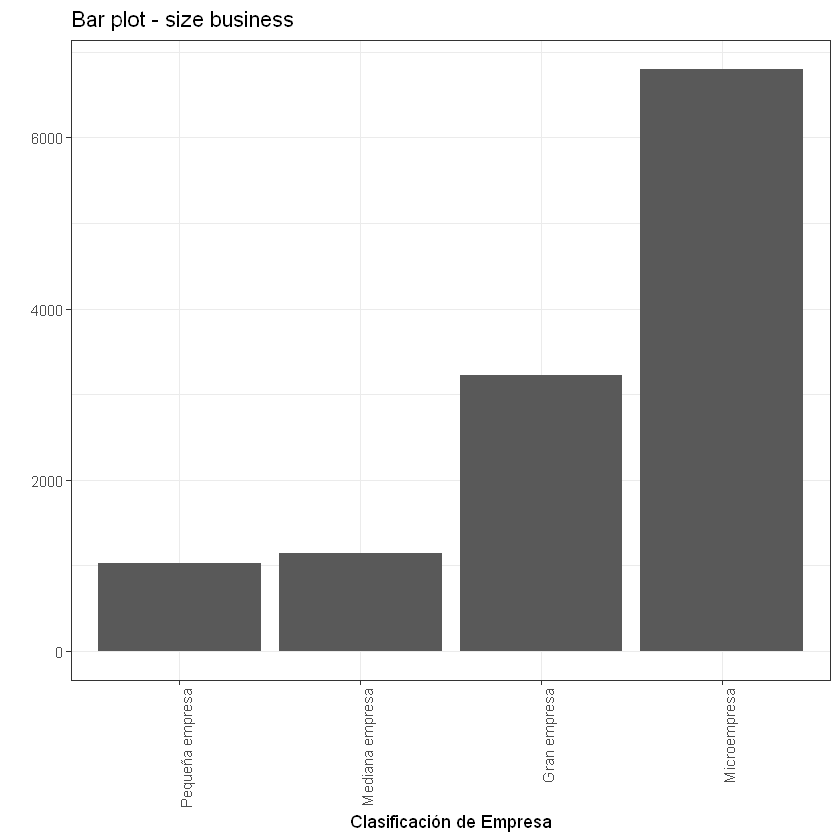

In [526]:
theme_set(theme_bw())

enaho %>% filter(year == 2019 & ! is.na(empresa)) %>%
    ggplot(aes(x= reorder(empresa, empresa, function(x) length(x)) )) + geom_bar() + 
                          labs(x = "Clasificación de Empresa", y = " ", title = "Bar plot - size business") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1))

                          

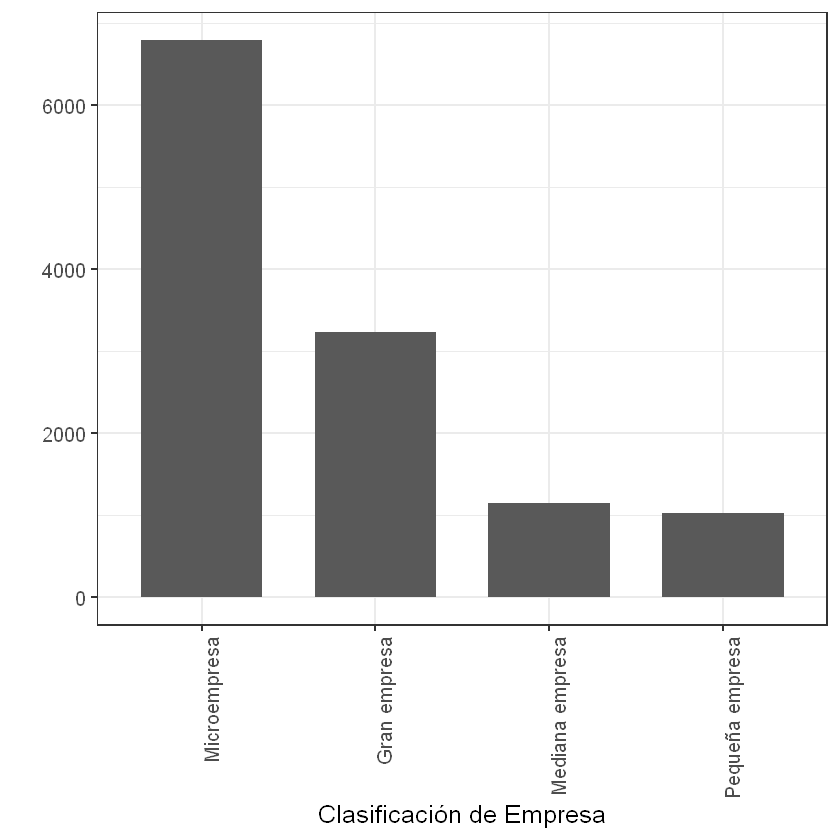

In [527]:
theme_set(theme_bw(15))  # change letter's size 

enaho %>% filter(year == 2019 & ! is.na(empresa)) %>%
    ggplot(aes(x= reorder(empresa, empresa, function(x) -length(x)) )) + geom_bar(width=0.7) + labs(x = "Clasificación de Empresa", y = " ") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [528]:

enaho %>%  filter(year == 2019 & ! is.na(empresa)) %>% group_by(empresa) %>%
        summarise(total = n())

empresa,total
<chr>,<int>
Gran empresa,3227
Mediana empresa,1145
Microempresa,6798
Pequeña empresa,1026


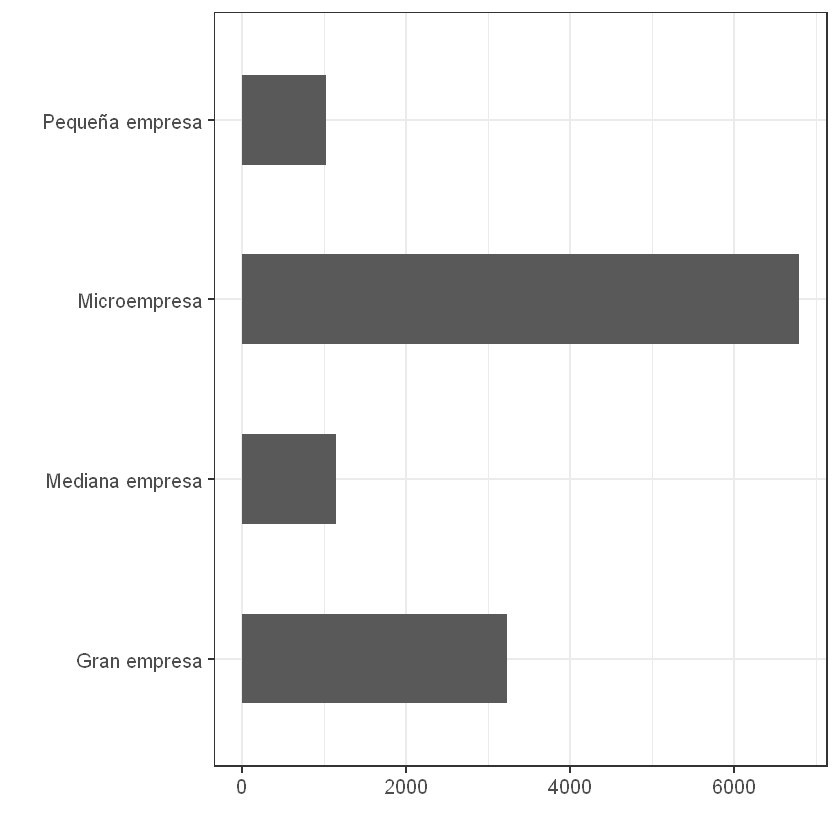

In [529]:
theme_set(theme_bw(15))

enaho %>%  filter(year == 2019 & ! is.na(empresa)) %>% group_by(empresa) %>%
        summarise(total = n())  %>%
    ggplot() + geom_col(aes(x = total, y= empresa), width = 0.5)  + labs(x = " ", y = " ")

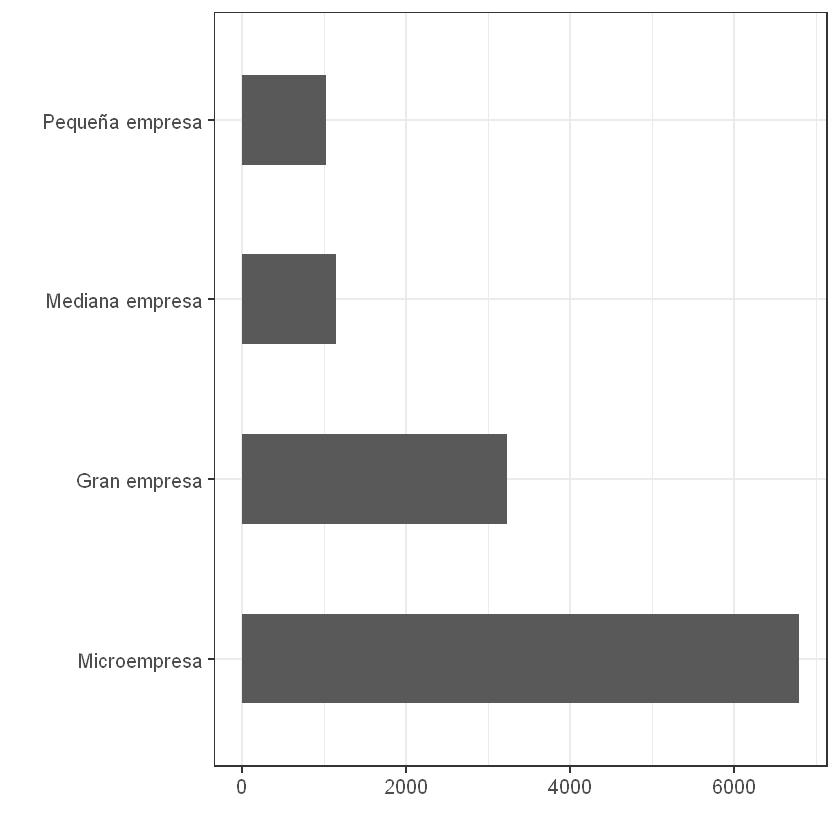

In [530]:
theme_set(theme_bw(15))

enaho %>%  filter(year == 2019 & ! is.na(empresa)) %>%
    ggplot() + geom_bar(aes(y= reorder(empresa, empresa, function(x) -length(x)) ), width = 0.5)  + labs(x = " ", y = " ")


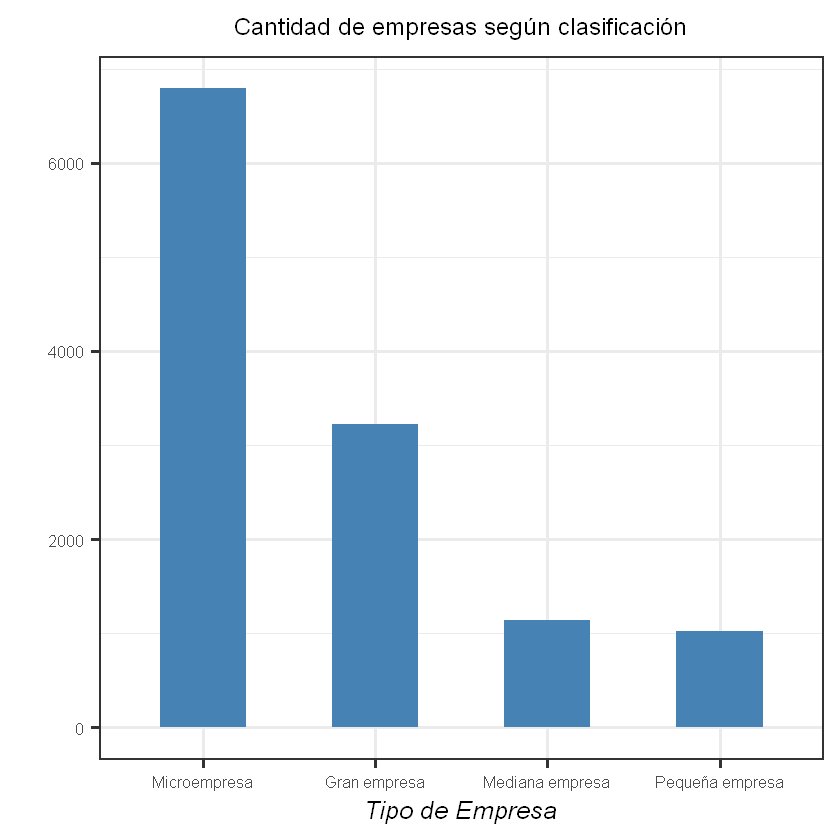

In [556]:
# Bar zise 

theme_set(theme_bw(20))

enaho %>%  filter(year == 2019 & ! is.na(empresa))  %>%
    ggplot(aes(x= reorder(empresa, empresa, function(x) -length(x)) )) +
    geom_bar( width=0.5 , fill="steelblue") + labs(x = "Tipo de Empresa", y = " ", title = "Cantidad de empresas según clasificación") + 
    theme(axis.title = element_text(size = 15, color = "black", face = "italic")) +   # change text format axis
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))   # center title
    
                          
    ggsave("../../data/imagen1.png", width = 10, height = 10, dpi = 200)  # dpi = resolution, 


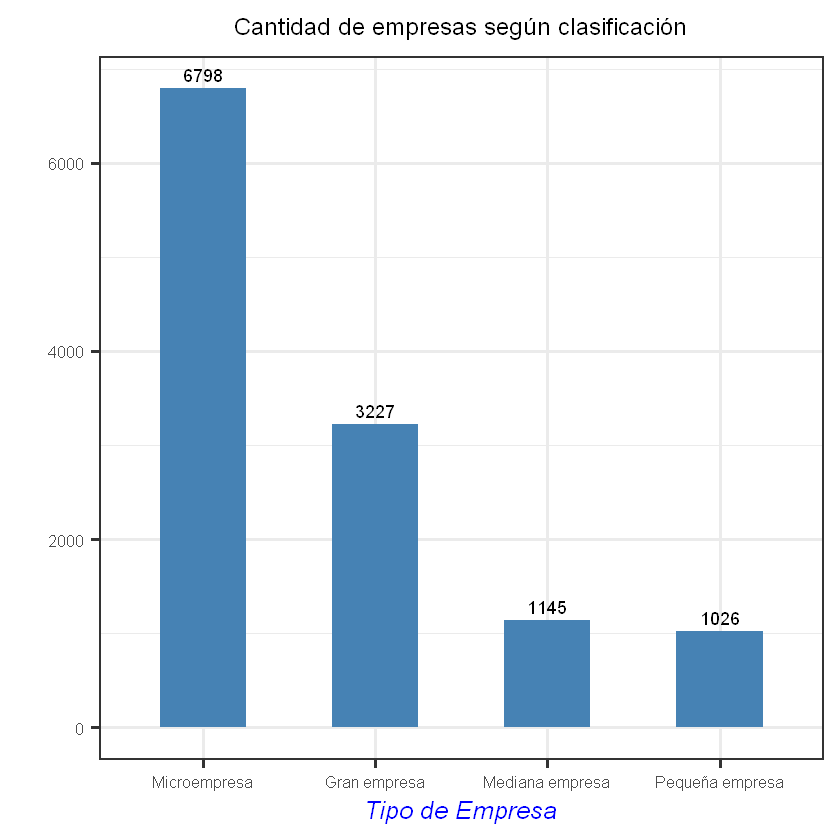

In [532]:
theme_set(theme_bw(20))

enaho %>%  filter(year == 2019 & ! is.na(empresa))  %>%
    ggplot(aes(x= reorder(empresa, empresa, function(x) -length(x)) )) +
    geom_bar( width=0.5 , fill="steelblue") + labs(x = "Tipo de Empresa", y = " ", title = "Cantidad de empresas según clasificación") + 
    theme(axis.title = element_text(size = 15, color = "blue", face = "italic")) + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
      geom_text(aes(x= empresa,label=..count..), stat='count', color="black", hjust = 0.5, vjust = -0.5 )

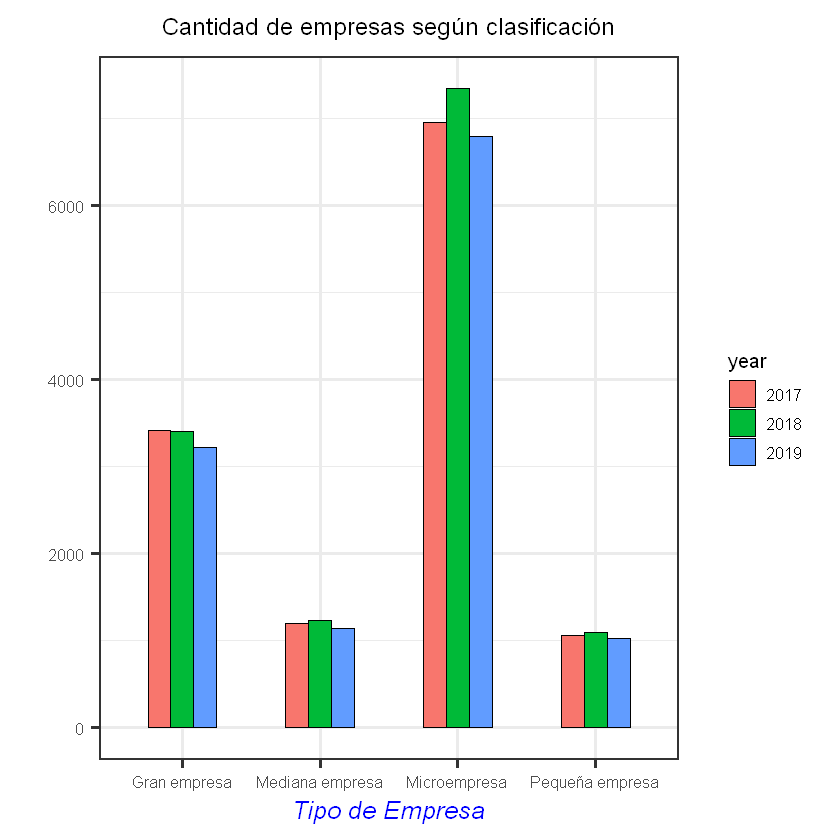

In [533]:

theme_set(theme_bw(20))

enaho %>%  filter(year > 2016 & ! is.na(empresa))  %>%
    ggplot(aes(x= empresa, fill = year)) +
    geom_bar(width=0.5, colour="black", position="dodge") + labs(x = "Tipo de Empresa", y = " ", title = "Cantidad de empresas según clasificación") + 
    theme(axis.title = element_text(size = 15, color = "blue", face = "italic")) + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

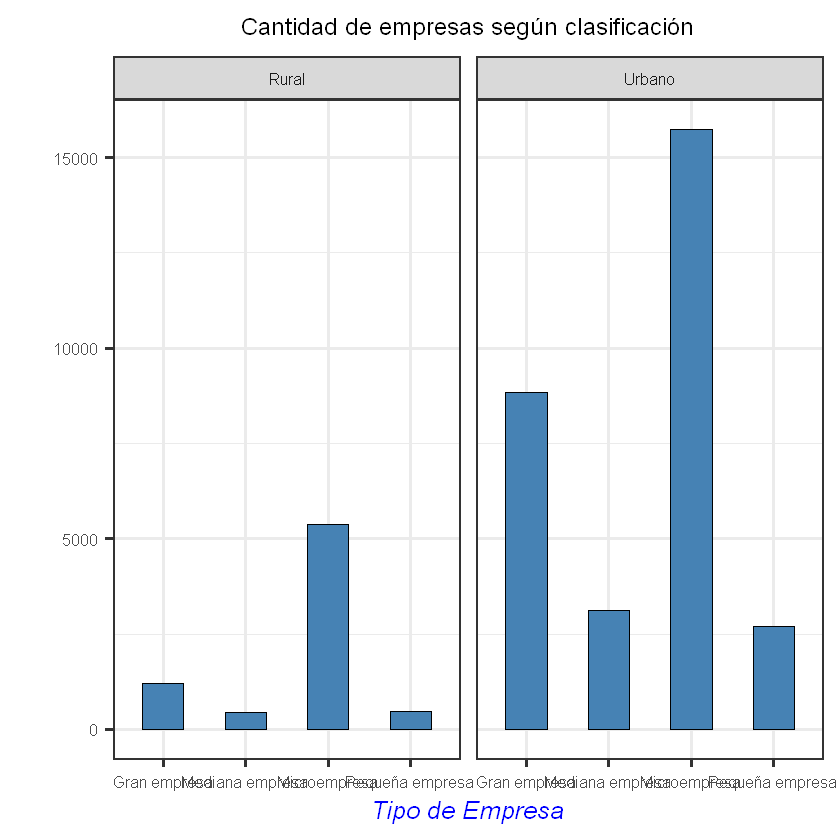

In [534]:

theme_set(theme_bw(20))

enaho %>%  filter(year > 2016 & ! is.na(empresa))  %>%
    ggplot() +
    geom_bar(aes(x= empresa), width=0.5 , fill="steelblue", color="black") +
    facet_wrap(~area) + # get two plots 
    labs(x = "Tipo de Empresa", y = " ", title = "Cantidad de empresas según clasificación") + 
    theme(axis.title = element_text(size = 15, color = "blue", face = "italic")) + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

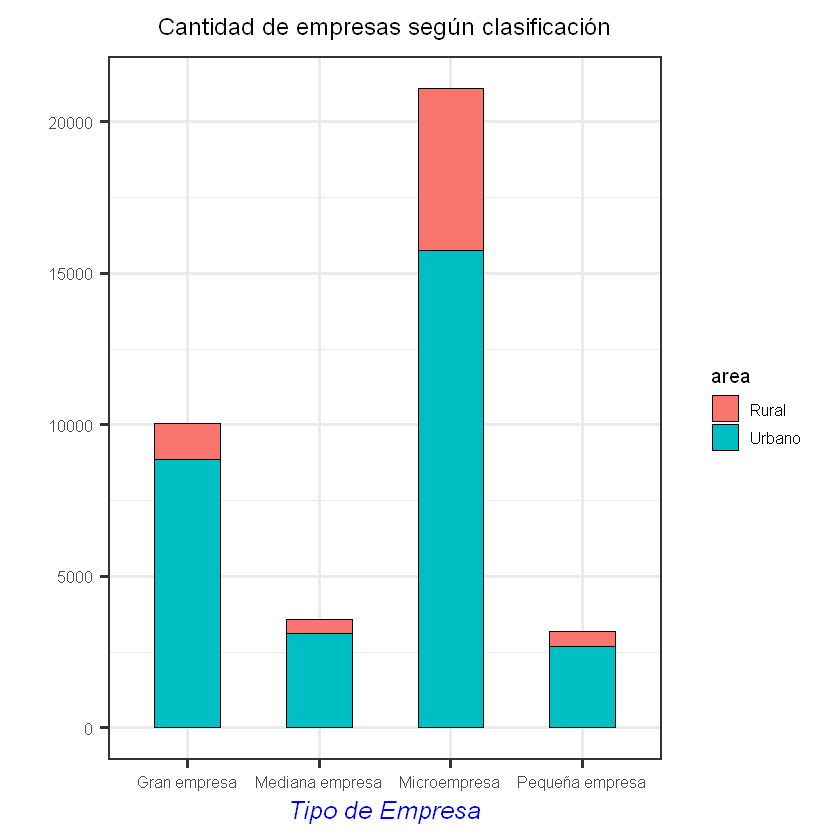

In [535]:
enaho %>%  filter(year > 2016 & ! is.na(empresa))  %>%
    ggplot() +
    geom_bar(aes(x= empresa, fill = area), width=0.5, colour="black") +
    labs(x = "Tipo de Empresa", y = " ", title = "Cantidad de empresas según clasificación") + 
    theme(axis.title = element_text(size = 15, color = "blue", face = "italic")) + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

## 2. Proportions

Understandable plots to show categorical variables. Use this plots to explain participations from categories. 

In [537]:
enaho %>%  filter(year == 2019 & ! is.na(empresa))  %>%  group_by(empresa) %>% 
    summarise(total_por_tipo = n())  %>%  mutate(percent = round(total_por_tipo/sum(total_por_tipo)*100,1)) 

empresa,total_por_tipo,percent
<chr>,<int>,<dbl>
Gran empresa,3227,26.5
Mediana empresa,1145,9.4
Microempresa,6798,55.7
Pequeña empresa,1026,8.4


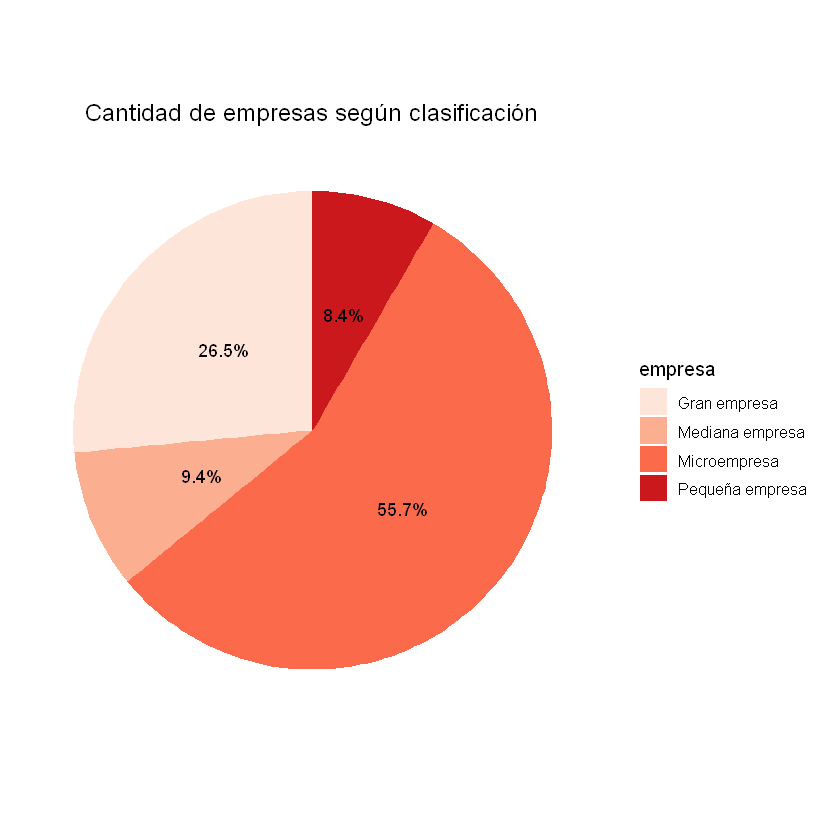

In [546]:
enaho %>%  filter(year == 2019 & ! is.na(empresa))  %>%  group_by(empresa) %>% 
    summarise(total_por_tipo = n())  %>%  mutate(percent = round(total_por_tipo/sum(total_por_tipo)*100,1))   %>% 
    ggplot(aes(x="", y=percent, fill=empresa)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(percent, "%")), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL) +
  theme_classic() +
labs( title = "Cantidad de empresas según clasificación") +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(), text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
  scale_fill_brewer(palette="Reds")
        

## 3. Distributions

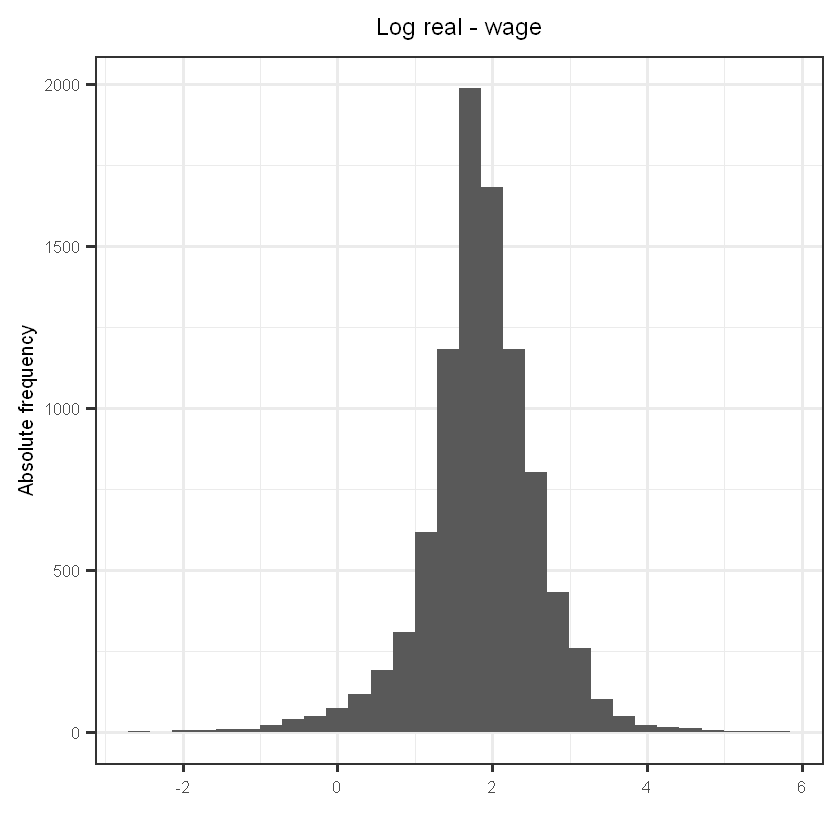

In [551]:
enaho %>%  filter(year == 2019 & !is.na(l_salario) ) %>%
  ggplot() + geom_histogram(aes(x=l_salario), bins = 30) +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) 

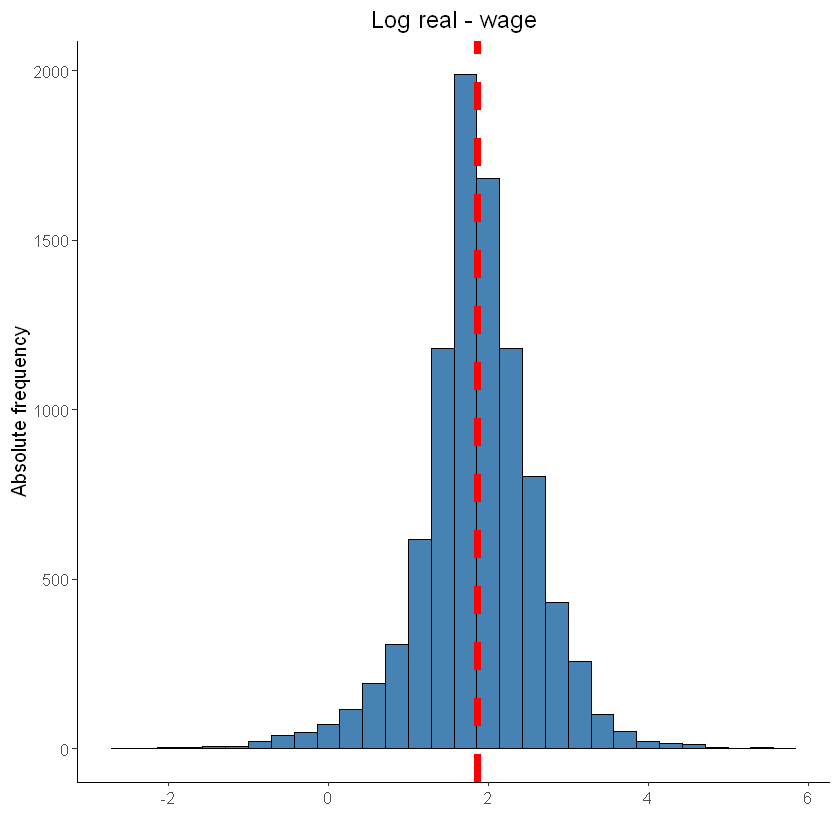

In [555]:
theme_set(theme_classic() + theme(legend.position = "top"))

enaho %>%  filter(year == 2019 & !is.na(l_salario) ) %>%
  ggplot() + geom_histogram(aes(x=l_salario), bins = 30, color = "black", fill = "steelblue") +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))  +
      geom_vline(aes(xintercept = mean(l_salario)), 
             linetype = "dashed", size =2 , color = "red")

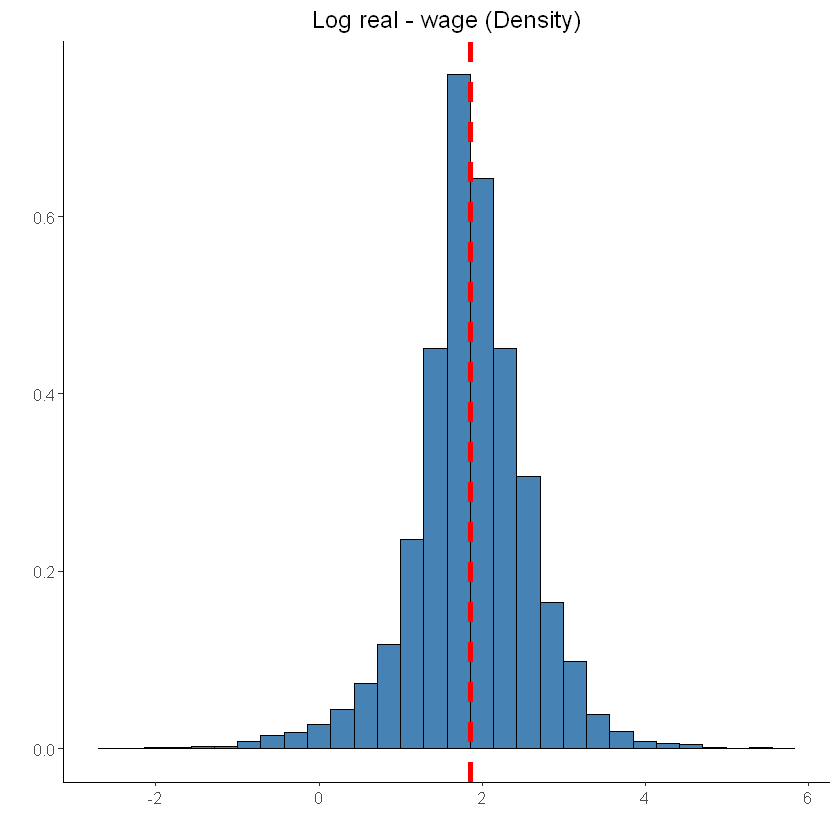

In [404]:
# relative histogram 

theme_set(theme_classic() + theme(legend.position = "top"))

enaho %>%  filter(year == 2019 & !is.na(l_salario) ) %>%
  ggplot() + geom_histogram(aes(x=l_salario, y = ..density..), bins = 30, color = "black", fill = "steelblue") +
    labs(x = " ", y = " ", title = "Log real - wage (Density)") + 
    theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))  +
      geom_vline(aes(xintercept = mean(l_salario)), 
             linetype = "dashed", , color = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



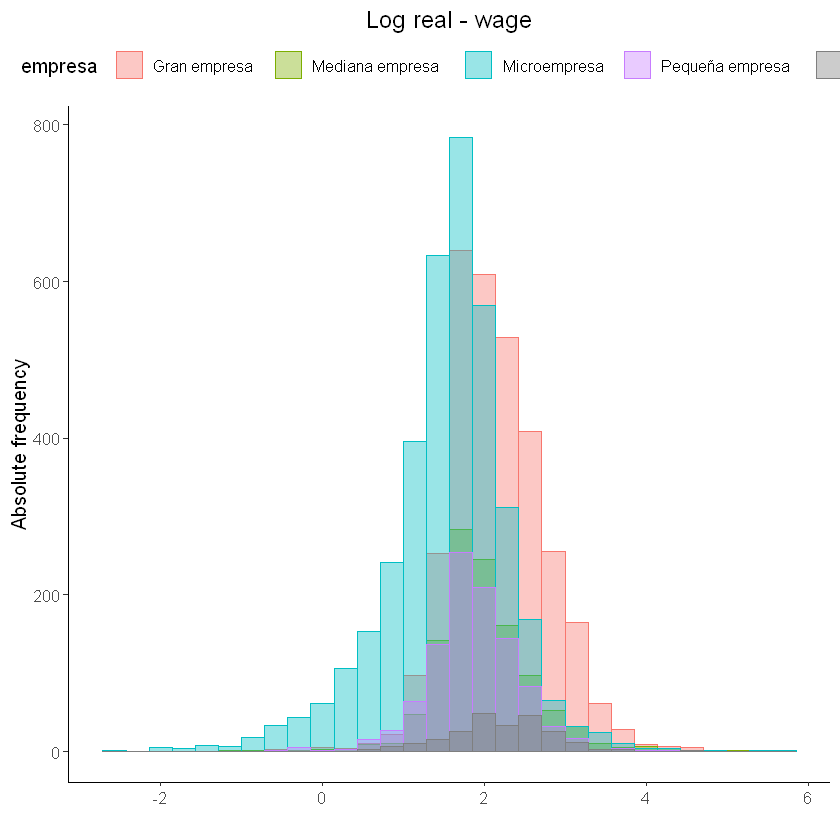

In [405]:
### Multiple histograms
theme_set(theme_classic() + theme(legend.position = "top"))

enaho %>%  filter(year == 2019 & !is.na(l_salario) ) %>%
 ggplot(aes(x=l_salario)) + geom_histogram(aes(color = empresa, fill = empresa),
                         alpha = 0.4, position = "identity") +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) 

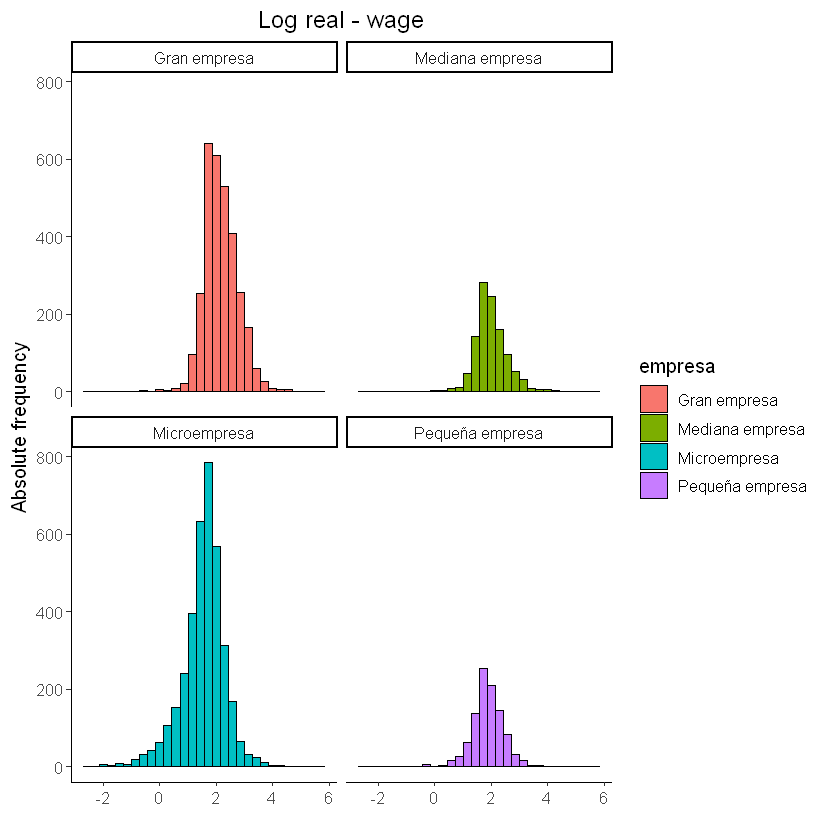

In [406]:
theme_set(theme_classic() + theme(legend.position = "right"))

enaho %>%  filter(year == 2019 & !is.na(l_salario)  & !is.na(empresa) ) %>%
 ggplot(aes(x=l_salario)) + geom_histogram(aes(fill = empresa), bins = 30, color ="black") +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~empresa)

Warning message:
"Ignoring unknown parameters: bins"


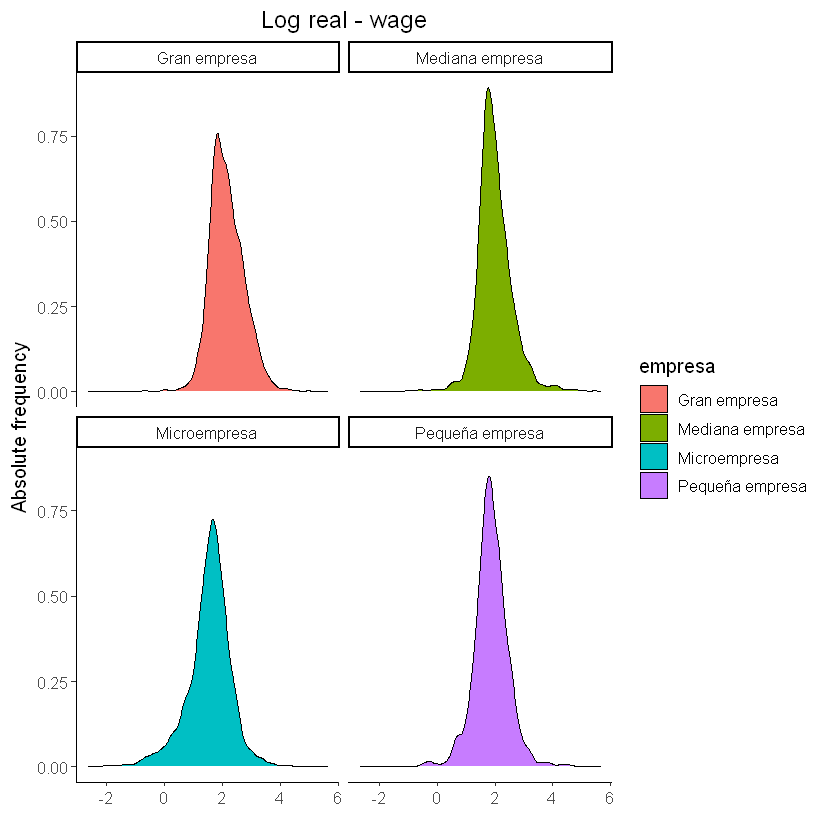

In [407]:
theme_set(theme_classic() + theme(legend.position = "right"))

enaho %>%  filter(year == 2019 & !is.na(l_salario)  & !is.na(empresa) ) %>%
 ggplot(aes(x=l_salario)) + geom_density(aes(fill = empresa), bins = 30) +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~empresa)

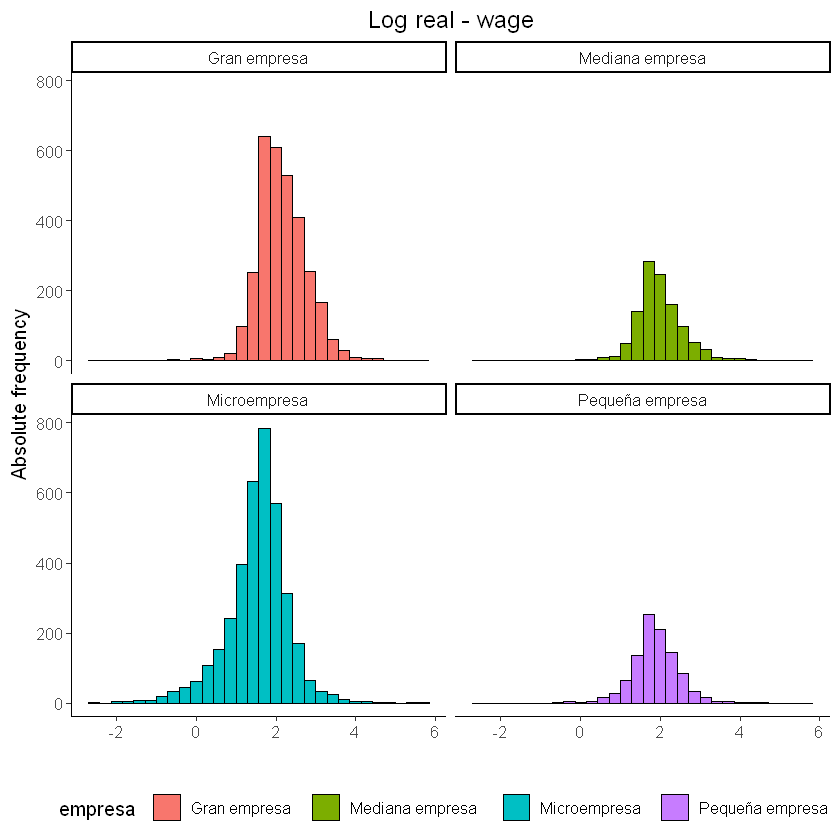

In [408]:
theme_set(theme_classic() + theme(legend.position = "bottom"))

enaho %>%  filter(year == 2019 & !is.na(l_salario)  & !is.na(empresa) ) %>%
 ggplot(aes(x=l_salario)) + geom_histogram(aes(fill = empresa), bins = 30, color ="black") +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~empresa)

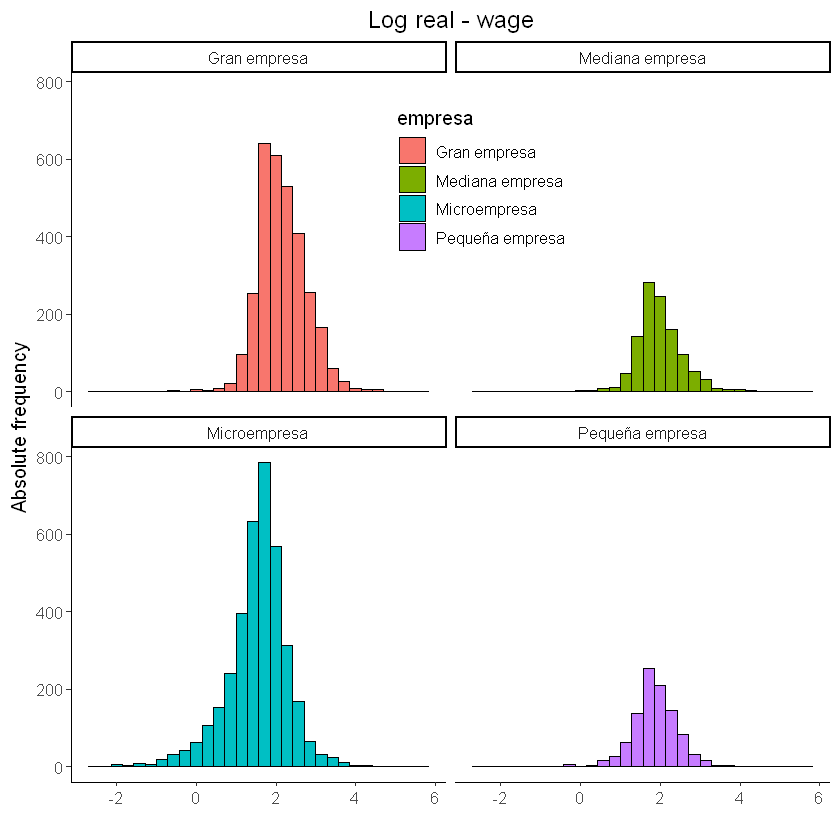

In [409]:
theme_set(theme_classic()) 

enaho %>%  filter(year == 2019 & !is.na(l_salario)  & !is.na(empresa) ) %>%
 ggplot(aes(x=l_salario)) + geom_histogram(aes(fill = empresa), bins = 30, color ="black") +
    labs(x = " ", y = "Absolute frequency", title = "Log real - wage") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~empresa) + theme(legend.position = c(0.55,0.85))

In [410]:
    enaho <- enaho %>% mutate(sector = case_when(sector == 1 ~ "Agricultura y pesca", sector == 2 ~ "Minería",
                                          sector == 3 ~ "Manufactura", sector == 4 ~ "Construcción",
                                          sector == 5 ~ "Comercio", sector == 6 ~ "Transporte y comunicaciones",
                                                sector == 7 ~ "Finanzas y seguros" , sector == 8 ~ "Servicios" ))

Warning message:
"Removed 345 rows containing non-finite values (stat_density)."
Warning message:
"Removed 345 rows containing non-finite values (stat_density)."


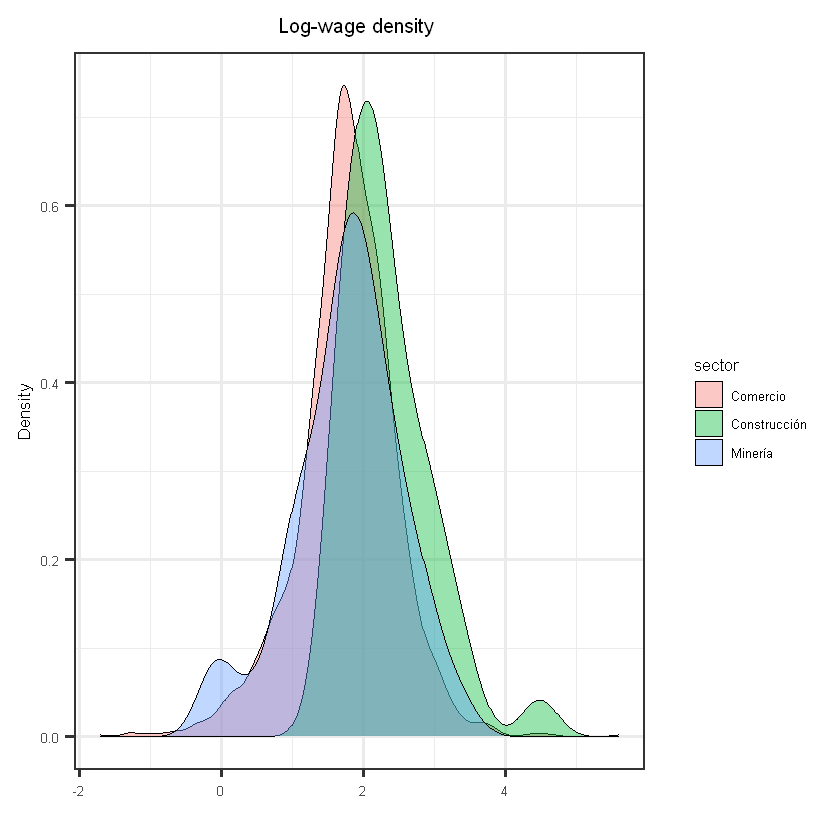

In [411]:
theme_set(theme_bw(20))

enaho %>% filter(year == 2019 & !is.na(sector)) %>% filter(sector %in% c("Construcción","Comercio", "Minería"))  %>%
ggplot(aes(x=l_salario, fill = sector , colour=sector)) +
  geom_density(alpha=0.4, color = "black") +
ggtitle("Log-wage density ") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5)) +
labs(x = "", 
     y = "Density")

 ggsave("imagen1.png", width = 10, height = 10, dpi = 200)

In [412]:
    enaho <- enaho %>% mutate(educ = case_when(educ == 6 ~ "Secundaria completa", educ == 7 ~ "No universitaria incompleta",
                                          educ == 8 ~ "No universitaria completa", educ == 9 ~ "Universitaria incompleta",
                                          educ == 10 ~ "Universitaria completa", educ == 11 ~ "Postgrado" ))

Warning message:
"Removed 8862 rows containing non-finite values (stat_boxplot)."


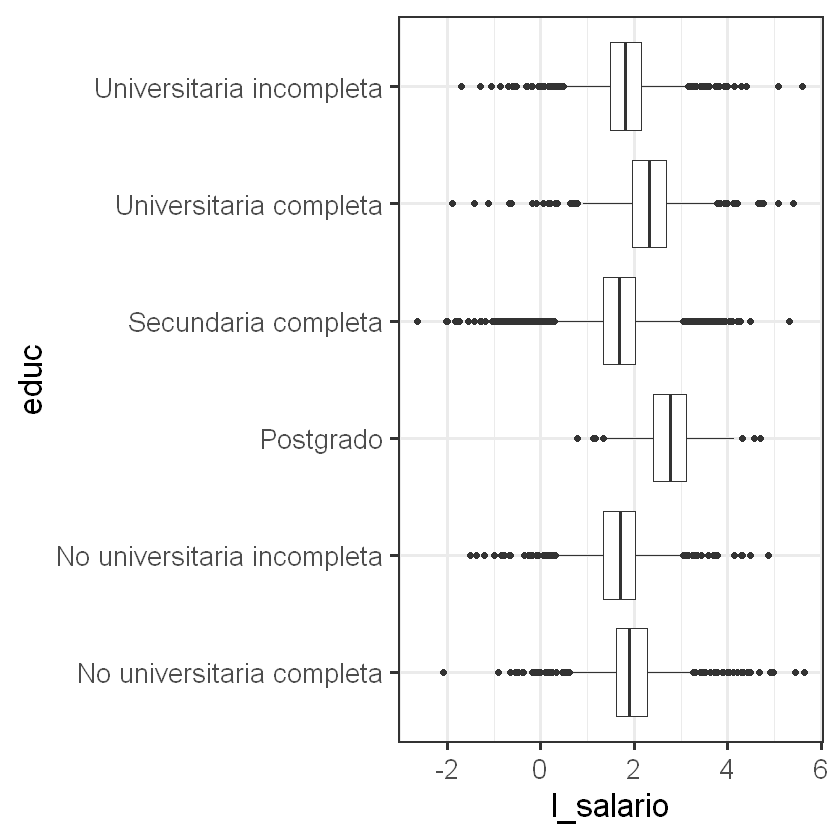

In [420]:
  enaho %>% filter(year == 2019 & !is.na(educ))  %>%
   ggplot() +  coord_flip()+
      geom_boxplot(aes(x=educ, y=l_salario))

Warning message:
"Removed 8862 rows containing non-finite values (stat_boxplot)."


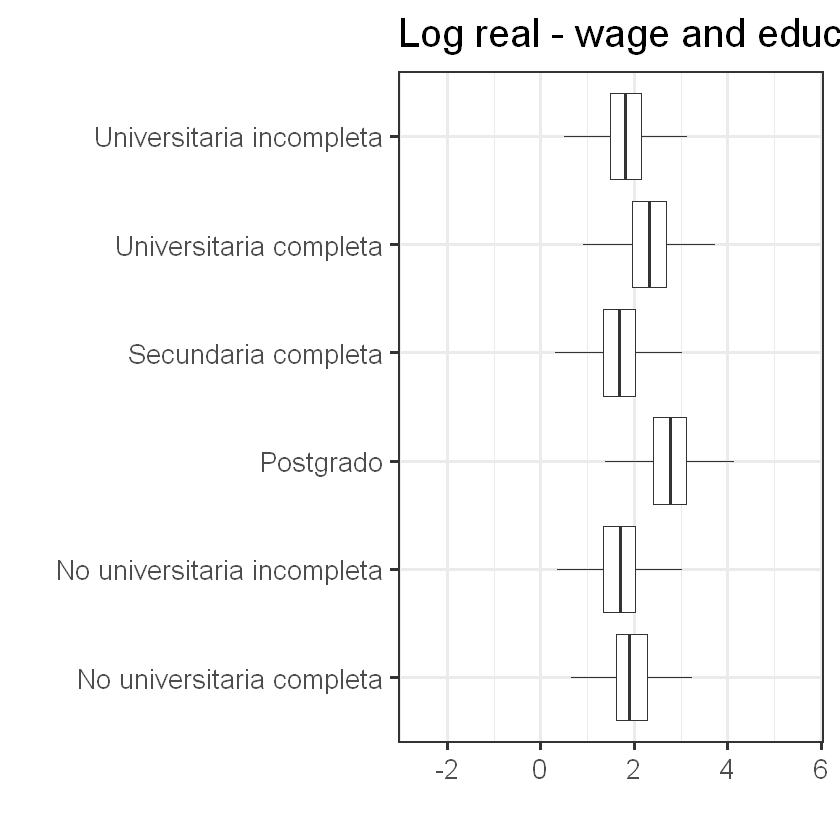

In [435]:
  enaho %>% filter(year == 2019 & !is.na(educ))  %>%
   ggplot() +  coord_flip()+
      geom_boxplot(aes(x=educ, y=l_salario), outlier.shape = NA, width = 0.8) + 
            labs(y = " ", x = " ", title = "Log real - wage and educational attaiment") 

## References


https://www.cedricscherer.com/2019/08/05/a-ggplot2-tutorial-for-beautiful-plotting-in-r/

https://datanalytics.com/libro_r/elementos-de-un-grafico-en-ggplot2.html

https://datavizpyr.com/add-percentage-label-on-bars-in-barplot-ggplot2/


https://www.learnbyexample.org/r-bar-plot-ggplot2/


https://bookdown.org/aschmi11/RESMHandbook/data-visualization-with-ggplot.html